In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.1 MB/s eta 0:00:00

real	0m17.455s
user	0m8.333s
sys	0m0.896s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_LR_HPT_FeatureImp.csv
 axl_U

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()

0    8975
1     916
Name: Target, dtype: int64

In [ ]:
dchm= sxl["Smiles"]
dchm

0       NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12
1                Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1
2                        COc1c(C)cnc(CN(C)C2CCCCC2)c1C
3                Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1
4                   CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C
                             ...                      
9886          Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1
9887              COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21
9888               CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2
9889              CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1
9890                Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1
Name: Smiles, Length: 9891, dtype: object

In [ ]:
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
maccs

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
9887,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9888,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9889,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsXGBoost_UMACCS_model.pkl'
joblib.dump(xgbc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.9666498231430015


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.966650
Recall 0.701571
precision 0.937063
F1 score: 0.802395


array([[1779,    9],
       [  57,  134]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.8482685617906462
Accuracy score: 0.9666498231430015
F1 score: 0.8023952095808383


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.784593
ROC AUC: 0.848269
[[1779    9]
 [  57  134]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1779    9]
 [  57  134]]


In [ ]:
##################################################Cross validation kfold=10
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
fit= xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbc,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.00


# Hyperparameter Tuning

---

Random Forest Hyperparameters we’ll be Looking at:

*   Number of trees (n_estimators)
*   Number of Samples (subsample)
*   Number of Features (max_features)
*   Learning Rate
*   Tree Depth (max_depth)
---
https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [ ]:

# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

>10 0.943 (0.003)
>50 0.960 (0.005)
>100 0.965 (0.005)
>500 0.977 (0.004)
>1000 0.979 (0.004)
>5000 0.978 (0.005)


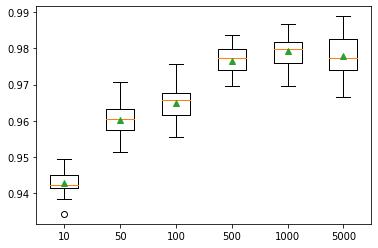

In [ ]:

# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X = df
y = sxl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.940 (0.025)
>1.1 nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsample mu

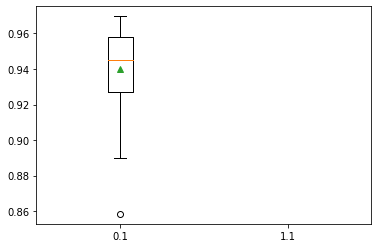

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in (0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i, n_estimators=1000)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X = df
y = sxl["Target"]

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1,21):
		models[str(i)] = GradientBoostingClassifier(max_features=i, subsample=0.1, n_estimators=1000)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.963 (0.019)
>2 0.935 (0.094)
>3 0.953 (0.047)
>4 0.916 (0.098)
>5 0.898 (0.109)


KeyboardInterrupt: ignored

In [ ]:
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i, max_features=i, subsample=0.1, n_estimators=1000)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i, learning_rate=i, max_features=i, subsample=0.1, n_estimators=1000)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X = df
y = sxl["Target"]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X = Xt_train
y = Yt_train
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [ 500]
grid['learning_rate'] = [ 0.001, 0.01, 0.1]
grid['subsample'] = [0.1]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969877 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.1}
0.908367 (0.000610) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.1}
0.908367 (0.000610) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.1}
0.908367 (0.000610) with: {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.1}
0.960439 (0.005620) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.1}
0.969413 (0.005733) with: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.1}
0.969877 (0.005482) with: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.1}
0.959385 (0.014274) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.1}
0.693676 (0.179044) with: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.1}
0.674639 (0.170951) with: {'learning_rate': 0.1, 'max_depth

#Feature Importance
---

https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html


In [ ]:
# load library
from sklearn.ensemble import GradientBoostingClassifier
# Best: 0.969877 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.1}
xgbc = GradientBoostingClassifier( learning_rate=0.01, subsample=0.1, n_estimators=500, max_depth= 9)

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
gbm_predict = xgbc.predict(Xt_test)# check performance

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,gbm_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, gbm_predict))
print('Accuracy score:',accuracy_score(Yt_test, gbm_predict))
print('F1 score:',f1_score(Yt_test, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, gbm_predict)
print(matrix)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbc,Xt_train, Yt_train, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores.mean())
print(scores.std())

Accuracy: 0.967660
Recall 0.717277
precision 0.931973
F1 score: 0.810651
ROCAUC score: 0.8558423228738419
Accuracy score: 0.9676604345629105
F1 score: 0.8106508875739645
Cohens kappa: 0.793298
ROC AUC: 0.855842
[[1778   10]
 [  54  137]]
0.97 accuracy with a standard deviation of 0.00
0.9697924248809204
0.003070413774559095


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsGBM_HPTFInal_UMACCS_model.pkl'
joblib.dump(xgbc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.9676604345629105


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbc,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores.mean())
print(scores.std())

0.97 accuracy with a standard deviation of 0.00
0.969035008747398
0.004699823778063684


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.969682
Recall 0.712042
precision 0.964539
F1 score: 0.819277


array([[1783,    5],
       [  55,  136]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.854622732117549
Accuracy score: 0.9696816574027286
F1 score: 0.8192771084337349


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.803139
ROC AUC: 0.854623
[[1783    5]
 [  55  136]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1783    5]
 [  55  136]]


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,10)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.60067016e-03 0.00000000e+00 0.00000000e+00 3.85411192e-03
 0.00000000e+00 6.56003248e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.16449384e-03 0.00000000e+00 4.35466444e-03
 0.00000000e+00 3.80332941e-05 1.40204549e-03 2.47815232e-03
 9.17889844e-04 1.14510255e-02 1.02527525e-03 2.80960176e-03
 1.27872590e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.26862507e-04 6.74367060e-04 1.09410521e-03 0.00000000e+00
 6.68438278e-03 2.96121904e-03 8.42071328e-03 1.18078733e-04
 5.34619865e-05 6.07827163e-03 7.48060805e-03 4.76812691e-03
 0.00000000e+00 2.62694491e-03 5.43326919e-03 7.57967848e-03
 1.59729755e-05 6.85055886e-04 2.44441548e-03 3.03395276e-04
 4.60532819e-03 1.42197632e-02 7.52449172e-03 1.86800751e-04
 2.82460450e-03 6.27484646e-03 3.48738068e-04 3.32711549e-03
 4.19012990e-04 1.17313820e-04 1.51820213e-02 3.98571578e-03
 3.70205221e-03 8.371698

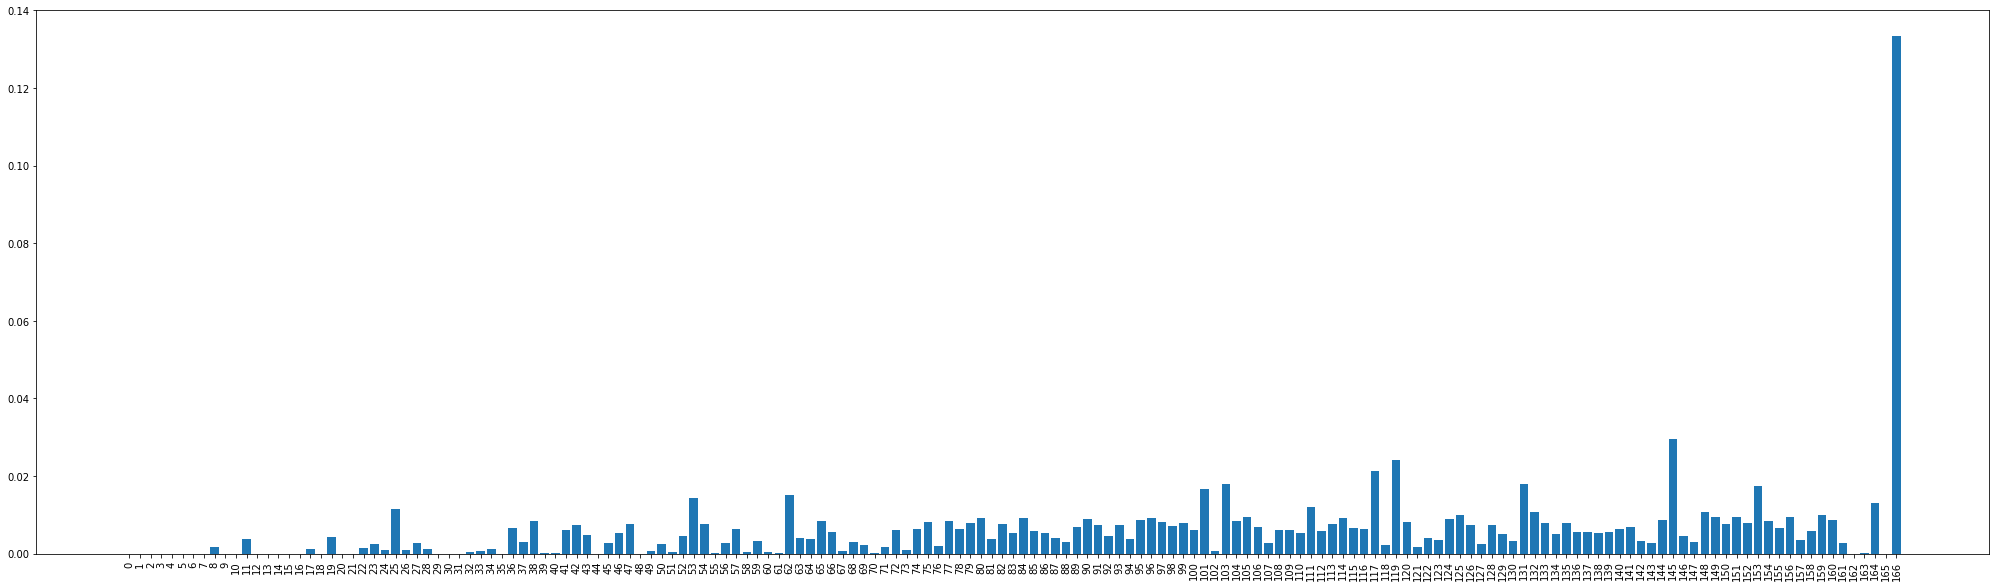

In [ ]:
# feature importance
import matplotlib.pyplot as pyplot
print(xgbc.feature_importances_)
# plot
pyplot.bar(range(len(xgbc.feature_importances_)), xgbc.feature_importances_)
plt.xticks([x for x in range(len(xgbc.feature_importances_))], rotation=90)
pyplot.show()

In [ ]:
imp= pd.DataFrame(xgbc.feature_importances_)
f_imp= imp.set_axis(['Score'], axis=1, inplace=False)
f_imp

,Score
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
162,3.177611e-05
163,2.727999e-04
164,1.295364e-02
165,1.561814e-12


In [ ]:
##
from google.colab import files

f_imp.to_csv('sxl_UnderMACCS_XGB_HPT_FeatureImp.csv', encoding = 'utf-8-sig') 
files.download('sxl_UnderMACCS_XGB_HPT_FeatureImp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp 'sxl_UnderMACCS_XGB_HPT_FeatureImp.csv' /content/drive/MyDrive/PhD/XGBoost_MACCS